### Figure 3: 
### _Fitting Failure_

---

In this experiment we consider the failure modes of the fitting algorithm mentioned in section 5.2.1. 

For this example, we compute the MPO-MPS product of a long range XY hamiltonian $H$ 
$$H=\frac{1}{2} \sum_{1 \leq i<j \leq n} \frac{J}{|i-j|^\alpha}\left(X_i X_j+Y_i Y_j\right) $$
with $\alpha=1.5, n=101$

with its ground state, which, again, was obtained using DMRG2 with tolerance $10^{-8}$. Despite performing 10 sweeps, the fitting algorithm fails to converge, or make any progress towards solving the problem. 

In [9]:
import sys
sys.path.append('../')
from util.benchmarking import *
import seaborn as sns 

from quantum.hamiltonians import long_range_XY_model
from quantum.dmrg import dmrg2
from tensornetwork.stopping import Cutoff
from tensornetwork.contraction import mps_mpo_blas
from tensornetwork.rounding import round_left
from util.benchmarking import fitting_experiment
from util.plotting import combined_plot_3

In [13]:
a = -.5 
N = 21# 101
#====== DMRG groundstate ======
H = long_range_XY_model(N,1,1.5)
initial_guess = MPS.random_mps(N, 2)

ground_state, _  = dmrg2(H, initial_guess, sweeps=2, stop=Cutoff(1e-8))
ground_state.canonize_left()
ground_state.show()

#====== High accuracy naive MPOMPS baseline ======
baseline = mps_mpo_blas(ground_state, H, stop=Cutoff(1e-15),round_type="dass_blas")
round_left(baseline, type="dass_blas") # prep for contraction
baseline.show()

100%|██████████| 77/77 [00:04<00:00, 16.98it/s] 


│2│4│8│16│32│32│32│32│32│32│32│32│32│32│32│32│16│8│4│2│
●-<-<-<--<--<--<--<--<--<--<--<--<--<--<--<--<--<-<-<-■
│2│4│8│16│32│64│128│256│499│541│541│496│256│128│64│32│16│8│4│2│
●-<-<-<--<--<--<━━━<━━━<━━━<━━━<━━━<━━━<━━━<━━━<--<--<--<-<-<-■


Benchmarking runtime and accuracy of approximate MPO MPS contraction for increasing $\overline{\chi}$ 

In [14]:
bond_dims = range(10, 20, 10) 
names = ['naive','fit','fit10',"random","random+oversample"]#,'fit10','random']#'density']#,'zipup_blas','density']

times, std_times, accs, std_accs = fitting_experiment(
    H, ground_state, baseline, bond_dims, names,
    num_runs=1,
    a=a,
    highres=True,
    return_data=True,
    fit_sweeps=1
)

,Bond Dimension,naive Mean Time,naive Time Std,naive Mean Accuracy,naive Accuracy Std,fit Mean Time,fit Time Std,fit Mean Accuracy,fit Accuracy Std,fit10 Mean Time,...,fit10 Mean Accuracy,fit10 Accuracy Std,random Mean Time,random Time Std,random Mean Accuracy,random Accuracy Std,random+oversample Mean Time,random+oversample Time Std,random+oversample Mean Accuracy,random+oversample Accuracy Std
0,10,1.32e+00,0.00e+00,9.09e-03,0.00e+00,3.49e-02,0.00e+00,9.08e-03,0.00e+00,2.11e-01,...,1.00e+00,0.00e+00,1.25e-02,0.00e+00,3.47e-02,0.00e+00,2.79e-02,0.00e+00,9.55e-03,0.00e+00


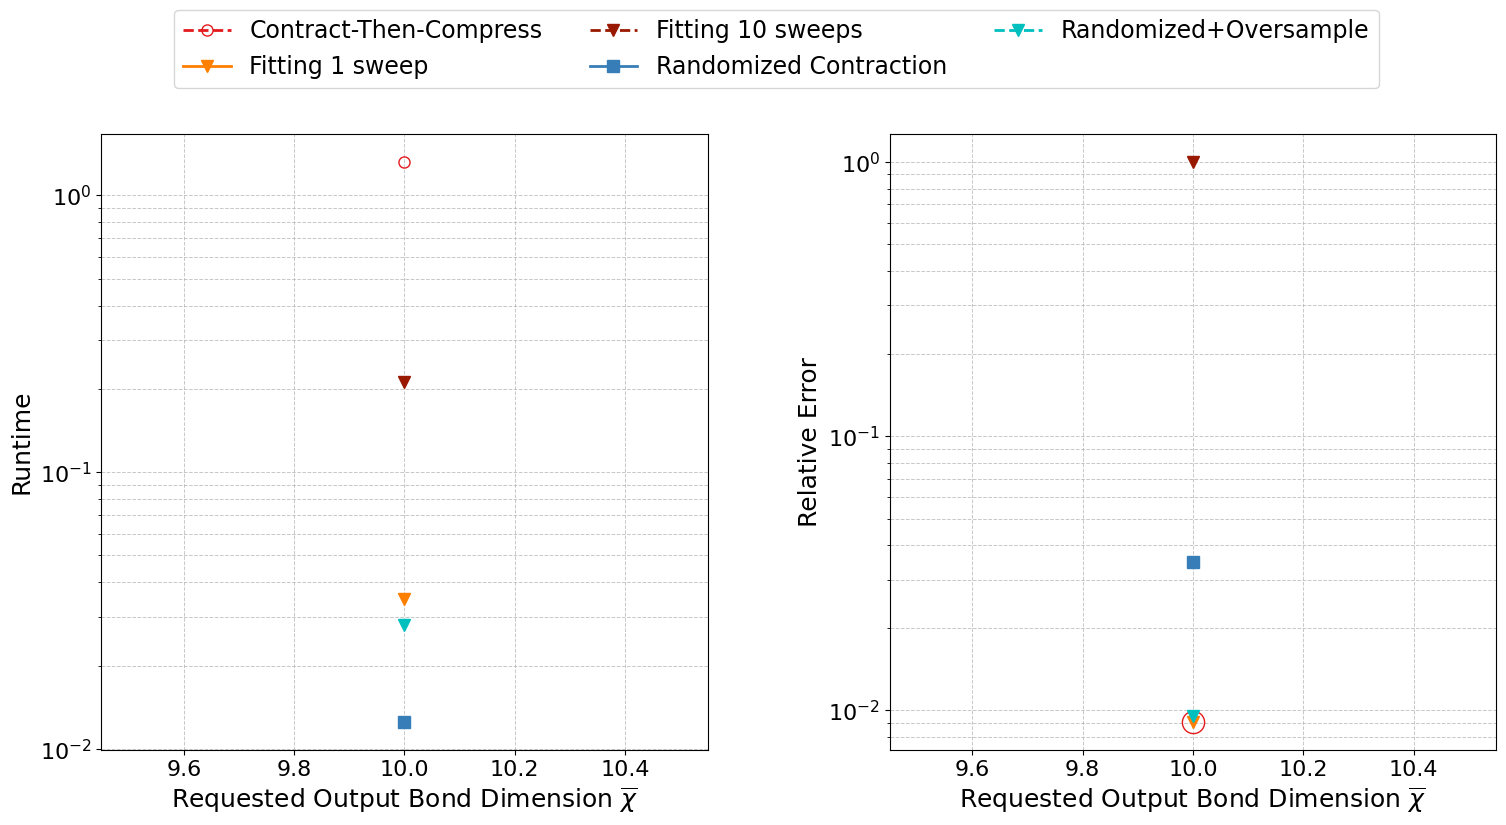

In [15]:
combined_plot_3(names,bond_dims,times,accs)